# STAT 542 / CS 598: Homework 1
### Edgar Pino

## Question 1a

In [98]:
import operator
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['ggplot'])

In [54]:
def get_distance(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.sqrt(np.sum(np.square(a - b)))

In [55]:
def get_neighbors(trainingSet, instance, k):
    distances = []

    for x in range(len(trainingSet)):
        distance = get_distance(instance, trainingSet[x][:-1])
        distances.append((trainingSet[x], distance))

    distances.sort(key=operator.itemgetter(1))
    
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0]) 
    return np.array(neighbors)

In [56]:
def get_label_average(neighbors):
    return np.average(neighbors[:,-1])

In [411]:
def mean_square_error(y_true, y_pred):
    return np.square(np.subtract(y_true,y_pred)).mean()

In [412]:
def myknn(xtest, xtrain, ytrain, k):
    nn = []
    training_data_xy = []
    
    for i in range(len(xtrain)):
        training_data_xy.append(np.append(xtrain[i],[ytrain[i]]))
        
    for i in range(len(xtest)):
        neighbors = get_neighbors(training_data_xy, xtest[i], k)
        predicted_label = get_label_average(neighbors)
        nn.append(predicted_label)
        
    return np.array(nn)

## Question 1b
https://peterroelants.github.io/posts/multivariate-normal-primer/

In [59]:
np.random.seed(1)

In [60]:
mean = [1,2,3,4,5]
cov = np.zeros((5,5))

In [61]:
for i in range(1,6):
    for j in range(1,6):
        cov[i-1][j-1] = pow(.5,(abs(i-j)))

In [62]:
cov

array([[1.    , 0.5   , 0.25  , 0.125 , 0.0625],
       [0.5   , 1.    , 0.5   , 0.25  , 0.125 ],
       [0.25  , 0.5   , 1.    , 0.5   , 0.25  ],
       [0.125 , 0.25  , 0.5   , 1.    , 0.5   ],
       [0.0625, 0.125 , 0.25  , 0.5   , 1.    ]])

In [63]:
x = np.random.multivariate_normal(mean, cov, 1000)

In [64]:
x

array([[-0.20645625,  0.62507688,  1.7750502 ,  2.40691521,  5.18134863],
       [ 3.7402364 ,  4.40503372,  4.35016723,  4.96114578,  5.39520319],
       [-0.86926549, -0.28132208,  2.10283711,  3.41796534,  5.90390064],
       ...,
       [ 0.75489172,  0.21293702,  2.17933804,  3.19109298,  4.4956944 ],
       [ 1.46270615,  1.56523677,  4.08432493,  5.01140189,  4.45909355],
       [ 1.47725666, -0.04487942,  2.17328603,  2.22584583,  4.13825209]])

In [65]:
e = np.random.randn(1000)

In [66]:
y = x[:,0] + x[:,1] + np.square((x[:,2] - 2.5)) + e

In [67]:
x[:3]

array([[-0.20645625,  0.62507688,  1.7750502 ,  2.40691521,  5.18134863],
       [ 3.7402364 ,  4.40503372,  4.35016723,  4.96114578,  5.39520319],
       [-0.86926549, -0.28132208,  2.10283711,  3.41796534,  5.90390064]])

In [68]:
y[:3]

array([ 0.01941756, 12.6972788 , -2.12164048])

## Question 1c

In [69]:
X_train, X_test, y_train, y_test = x[:400], x[400:], y[:400], y[400:]

In [75]:
y_pred = myknn(X_test, X_train, y_train, 5)

In [76]:
mean_square_error(y_test, y_pred)

1.5558223877014192

## Question 1d

In [80]:
reg = LinearRegression().fit(X_train, y_train)

In [81]:
lm_y_pred = reg.predict(X_test)

In [82]:
lm_mse = mean_square_error(y_test, lm_y_pred)

In [83]:
lm_mse

2.424736481615183

In [84]:
k_vals = np.arange(1,101)

In [85]:
knn_errors = np.zeros(100)

In [86]:
for i in range(len(k_vals)):
    y_pred = myknn(X_test, X_train, y_train, k_vals[i])
    knn_errors[i] = mean_square_error(y_test, y_pred)

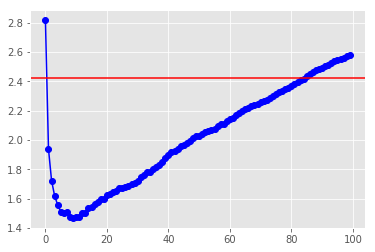

In [117]:
plt.plot(knn_errors,'-o', color='blue')
plt.axhline(y=lm_mse, color='r')
plt.show()

In [102]:
plt.show()

## Question 2a

In [394]:
def gradient_descent(x, y, b, delta, epsilon, maxitr):
    iterations = 1
    cost_history = []
    m = len(y)

    while True:
        h = x.dot(b)
        loss = h - y

        gradient = x.T.dot(loss) / m

        b_new = b - delta * gradient

        cost = np.sum(abs(b_new - b))
        cost_history.append(cost)
        
        b = b_new
        
        if cost < epsilon:
            break
            
        if iterations == maxitr:
            break
        
        iterations +=1

    return b, cost_history

In [395]:
def mylm_g(x, y, delta, epsilon, maxitr):
    beta = np.zeros(x.shape[1])
    
    newB, _ = gradient_descent(x, y, beta, delta, epsilon, maxitr)
    return newB

## Question 2b

In [396]:
x = pd.read_csv('./boston-data.csv')

In [397]:
x = x.drop([x.columns[0],'medv', 'town', 'tract'],axis=1)

In [398]:
x.shape

(506, 16)

In [399]:
x[:10]

,lon,lat,cmedv,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-70.9550,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,-70.9500,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,-70.9360,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,-70.9280,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,-70.9220,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
5,-70.9165,42.3040,28.7,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
6,-70.9360,42.2970,22.9,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
7,-70.9375,42.3100,22.1,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
8,-70.9330,42.3120,16.5,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
9,-70.9290,42.3160,18.9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [400]:
x = pd.DataFrame(scale(x), index=x.index, columns=x.columns)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [401]:
x[:10]

,lon,lat,cmedv,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,1.345913,0.624791,0.160376,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,1.412287,1.151396,-0.101258,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,1.598134,1.078482,1.326830,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,1.704333,1.240514,1.185112,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,1.783981,1.321530,1.490352,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
5,1.856993,1.418749,0.672744,-0.417044,-0.487722,-1.306878,-0.272599,-0.835284,0.207096,-0.351157,1.077737,-0.752922,-1.106115,0.113032,0.410571,-1.043322
6,1.598134,1.305327,0.040460,-0.410243,0.048772,-0.476654,-0.272599,-0.265154,-0.388411,-0.070229,0.839244,-0.523001,-0.577519,-1.505237,0.426798,-0.031268
7,1.578222,1.515969,-0.046751,-0.403696,0.048772,-0.476654,-0.272599,-0.265154,-0.160466,0.978808,1.024638,-0.523001,-0.577519,-1.505237,0.441052,0.910700
8,1.637959,1.548375,-0.657232,-0.395935,0.048772,-0.476654,-0.272599,-0.265154,-0.931206,1.117494,1.087196,-0.523001,-0.577519,-1.505237,0.328448,2.421774
9,1.691058,1.613188,-0.395597,-0.400729,0.048772,-0.476654,-0.272599,-0.265154,-0.399808,0.616090,1.329635,-0.523001,-0.577519,-1.505237,0.329325,0.623344


In [402]:
y = x.cmedv.to_numpy()

In [403]:
x = x.drop(['cmedv'],axis=1).to_numpy()

In [404]:
x.shape, y.shape

((506, 15), (506,))

In [405]:
# Train params
delta = 0.1
epsilon = 1e-7
max_iterations = 5000

In [406]:
my_beta = mylm_g(x,y, delta, epsilon, max_iterations)

In [407]:
reg = LinearRegression().fit(x, y)

In [408]:
lm_beta = reg.coef_

In [409]:
beta_df = pd.DataFrame({'lm': lm_beta, 'mylm_g': my_beta})

In [410]:
beta_df

,lm,mylm_g
0,-0.032316,-0.032317
1,0.030245,0.030245
2,-0.097936,-0.097936
3,0.118273,0.118272
4,0.011390,0.011388
5,0.071312,0.071313
6,-0.199704,-0.199703
7,0.287233,0.287233
8,0.007565,0.007565
9,-0.321039,-0.321039
